# Exploratory Data Analysis of Haberman Dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
haberman=pd.read_csv('./haberman.csv')

In [3]:
haberman.info

<bound method DataFrame.info of      age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]>

In [4]:
haberman.shape

(306, 4)

In [5]:
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [6]:
# 1: the patient survived 5 years or longer
# 2: the patient died within 5 year
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

# Objective

To find and predict whether the patient will suvive the treatment or not.

# Bivariate Analysis

## Scatter plot

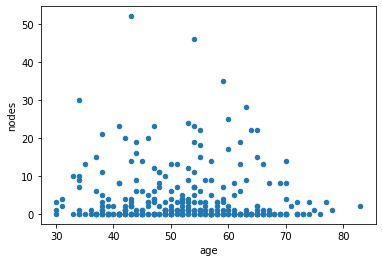

In [7]:
# can't make any sense out of it
haberman.plot(kind='scatter',x='age',y='nodes')
plt.show()

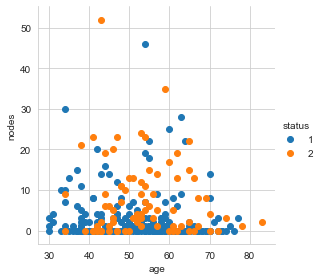

In [8]:
# now let's color the classes 1 and 2

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',height=4).map(plt.scatter,'age','nodes').add_legend()
plt.show()

# Observation:

Nothing can be seperated easily
It is harer to seperate 1 and 2 due to considerable overlap

# Pair Plots

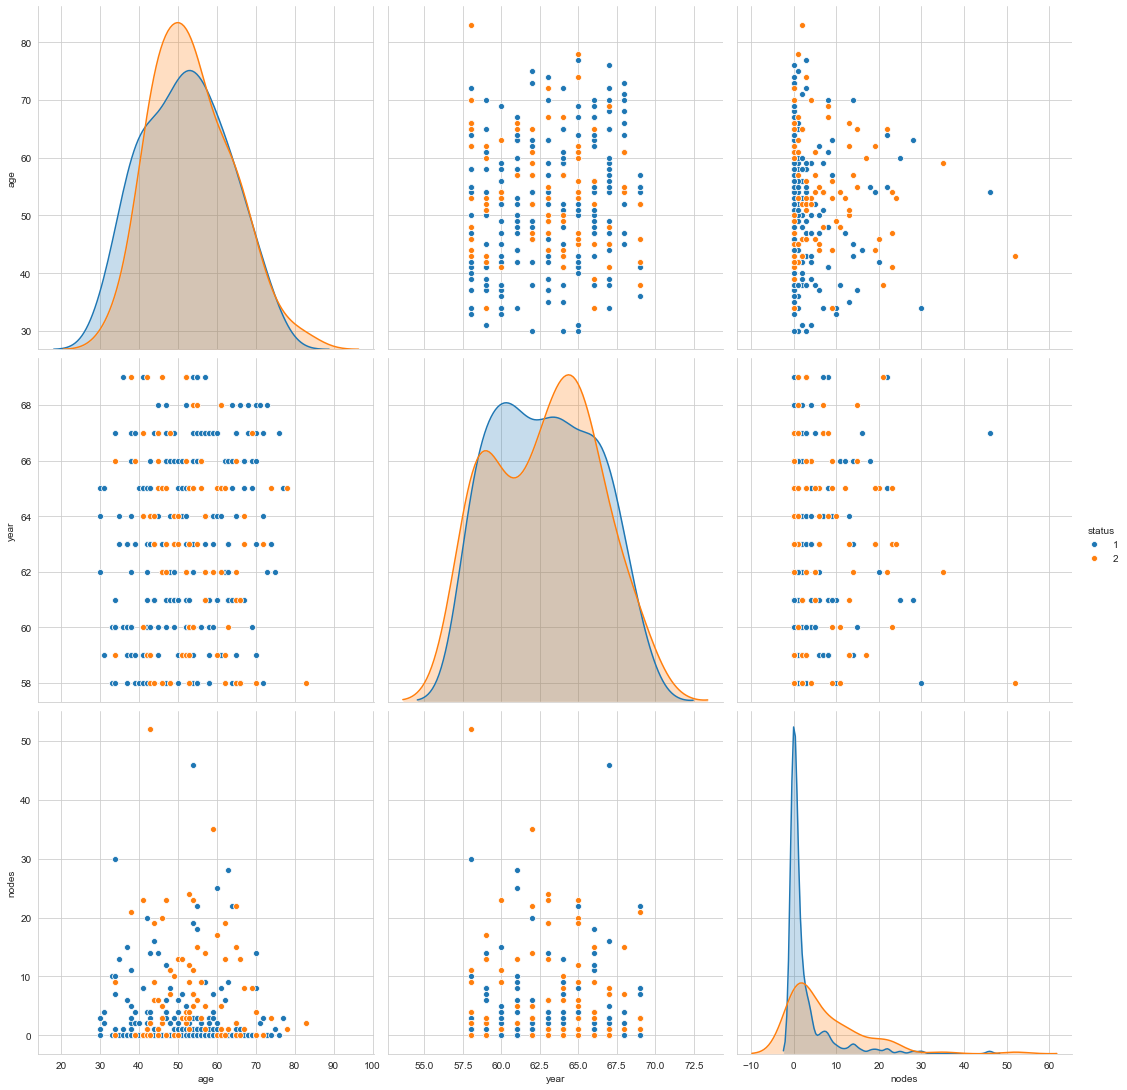

In [28]:
# Let's draw pair plots as the number of dimensions are not too much

plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue='status',height=5)
plt.show()

# Diagonals are Pdfs

# Observations

Plot 2 : As both are really overlapping thus there is no means of distinguishing anything [Reject]

Plot 3: This plot is better than others (age vs nodes) [Pick]

Plot 4 : This is almost similiar to plot 2 [Reject]

Plot 6 : Too much overlapping [Reject]

Plot 7 : This is somewhat better than the rejected ones and close to 3rd plot [Pick]

Plot 8 : Same as 6 [Reject]

# Univariate Analysis

In [10]:
haberman_1=haberman.loc[haberman['status']==1]
haberman_2=haberman.loc[haberman['status']==2]


# PDF

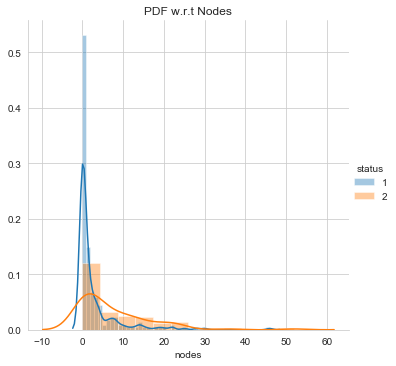

In [11]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'nodes').add_legend()
plt.title("PDF w.r.t Nodes")
plt.show()

# Obseravtions

People with nodes 0 will not die.

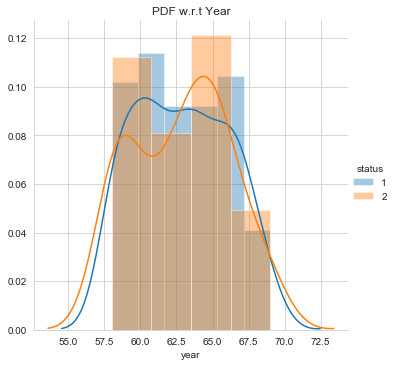

In [12]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'year').add_legend()
plt.title("PDF w.r.t Year")
plt.show()

# Observations

The people who were operated in the year 60 to ~66 died.

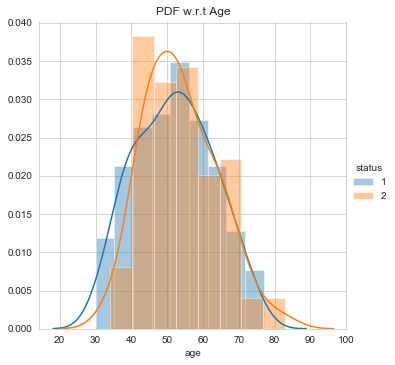

In [13]:
# PDF of age

sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'age').add_legend()
plt.title("PDF w.r.t Age")
plt.show()

# Observations

From the PDF of nodes we can see that lesser the nodes the higher is the survival rate and vice-versa.

It is seen that people within range of 40-60 has higher chances of death.

People less than 40 age less likely to die.

With PDF we were only able to deduce the number of high and low survival patients but what if we want to find the percentage of patients?

Let's plot CDF

# CDF

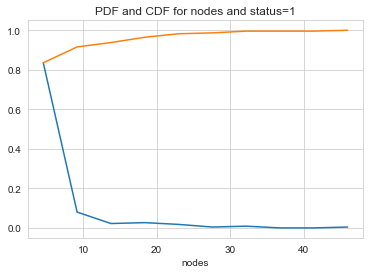

In [14]:
count,bin_edges=np.histogram(haberman_1['nodes'],bins=10,density=True)
pdf=count/sum(count)

cdf=np.cumsum(pdf)

plt.title("PDF and CDF for nodes and status=1")
plt.xlabel('nodes')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Observation

From the CDF plot we can see that around there is 85% chance of survival if the nodes are less than ~5. 

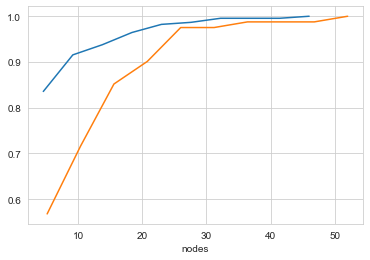

In [15]:
# cdf plot for class 1
count,bin_edges=np.histogram(haberman_1['nodes'],bins=10,density=True)
pdf=count/sum(count)

cdf=np.cumsum(pdf)

plt.xlabel('nodes')
# plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# cdf plot for class 2
count,bin_edges=np.histogram(haberman_2['nodes'],bins=10,density=True)
pdf=count/sum(count)

cdf=np.cumsum(pdf)

# plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Observation

The number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival. <br>
If they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40

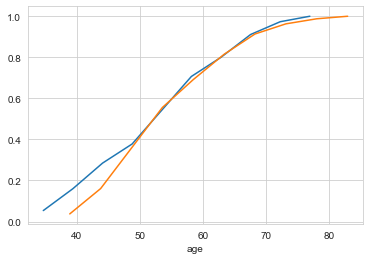

In [16]:
# cdf plot for class 1
count,bin_edges=np.histogram(haberman_1['age'],bins=10,density=True)
pdf=count/sum(count)

cdf=np.cumsum(pdf)

# plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')

# pdf and cdf plot for class 2
count,bin_edges=np.histogram(haberman_2['age'],bins=10,density=True)
pdf=count/sum(count)

cdf=np.cumsum(pdf)

# plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Observations

### From class 1

People between 50-60 have higher chance of survival<br>
Almost 90% of patient who survived have age <=70.

### From class 2

It is observed that around 75% of the died within 5 have age less than or equal to 60 

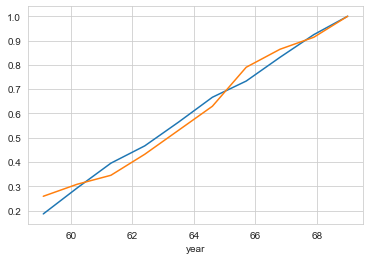

In [17]:
# cdf plot for class 1
count,bin_edges=np.histogram(haberman_1['year'],bins=10,density=True)
pdf=count/sum(count)

cdf=np.cumsum(pdf)

# plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('year')

# pdf and cdf plot for class 2
count,bin_edges=np.histogram(haberman_2['year'],bins=10,density=True)
pdf=count/sum(count)

cdf=np.cumsum(pdf)

# plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Observations

60% of the patients having who went for surgery in or before 1964 survived.

# Mean and Standard Deviation

In [18]:
print("Means:")
print(np.mean(haberman_1['nodes']))
print(np.mean(haberman_2['nodes']))

print()

print("Standard Deviation:")
print(np.std(haberman_1['nodes']))
print(np.std(haberman_2['nodes']))


Means:
2.7911111111111113
7.45679012345679

Standard Deviation:
5.857258449412131
9.128776076761632


# Observations

As we can see that the mean of nodes of class 2 is much higher than class 1 this means that there is high probability of people with <5 year suvival.

From the std dev values we can see imagine the spread of the graph for both the classes. Ofcourse the spread of class 2 is higher.

# Median, Quartiles and Percentile

In [19]:
print("Medians:")
print(np.median(haberman_1['nodes']))
print(np.median(haberman_2['nodes']))

print("Quartiles:")
print(np.percentile(haberman_1['nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_2['nodes'],np.arange(0,100,25)))

print("90th Percentile:")
print(np.percentile(haberman_1['nodes'],90))
print(np.percentile(haberman_2['nodes'],90))

Medians:
0.0
4.0
Quartiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
90th Percentile:
8.0
20.0


# Observations

Average number of nodes in class 1 is 0 and in class 2 it is 4 i.e patients who have average 4 auxillary nodes have short survival status.
<br>
<br>
**From the Quartiles we can see that in class 1:<br>**
25% = >3 nodes<br>
75% = <3 nodes<br>
50% = 0 nodes
<br>
<br>
**From the Quartiles we can see that in class 2:<br>**
25% = >11 nodes<br>
75% = <11 nodes<br>
50% = >4 nodes
<br>
<br>
**From 90th percentile we can deduce that:<br>**
In class 1 90% of patients have nodes less than 8<br>
In class 2 90% of the patients have nodes less than 20

# Box Plots

Text(0.5, 1.0, 'Box Plot using feature age')

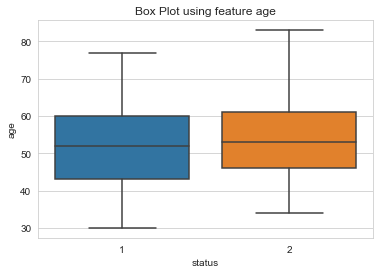

In [20]:
sns.boxplot(x='status',y='age',data=haberman)
plt.title("Box Plot using feature age")

# Observation

Almost 95% of the data points are overlapping with the same median hence, age is not sufficient 

Text(0.5, 1.0, 'Box Plot using feature nodes')

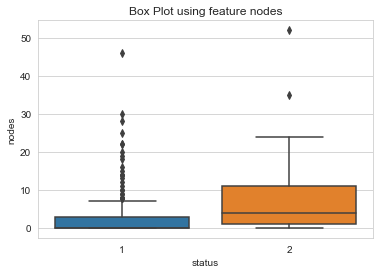

In [21]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.title("Box Plot using feature nodes")

# Observations

Class 1 has a lot of outliers and almost 60% of patients have nodes less than equal to 3
<br>
In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2

Text(0.5, 1.0, 'Box Plot using feature year')

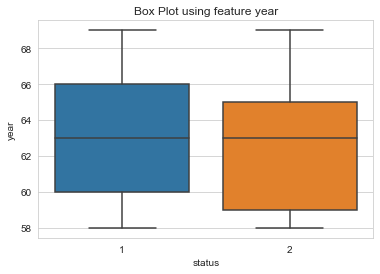

In [22]:
sns.boxplot(x='status',y='year',data=haberman)
plt.title("Box Plot using feature year")

# Observations

This feature is not useful because of overlap

# Violin plot

Text(0.5, 1.0, 'Violin plot using feature age')

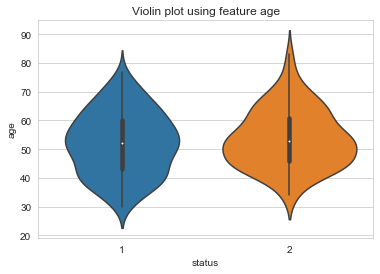

In [23]:
sns.violinplot(x='status',y='age',data=haberman)
plt.title("Violin plot using feature age")

# Observations

Too much overlapping!

Text(0.5, 1.0, 'Violin plot using feature nodes')

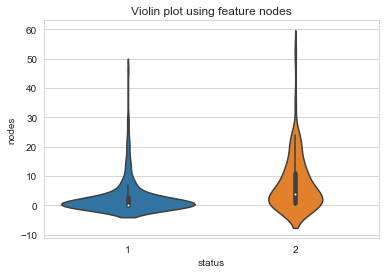

In [24]:
sns.violinplot(x='status',y='nodes',data=haberman)
plt.title("Violin plot using feature nodes")

# Observations

The survived patiets have nodes=0 (median)
<br>
The patients who died had nodes greater than or equal to 1, as the concentration of the nodes increase the respective patient is more likely to die

Text(0.5, 1.0, 'Violin plot using feature year')

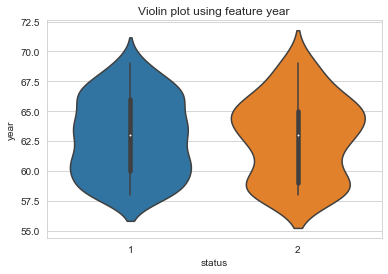

In [25]:
sns.violinplot(x='status',y='year',data=haberman)
plt.title("Violin plot using feature year")

# Observations

Too much overlapping!

# 2-D density plot (Contour plot)

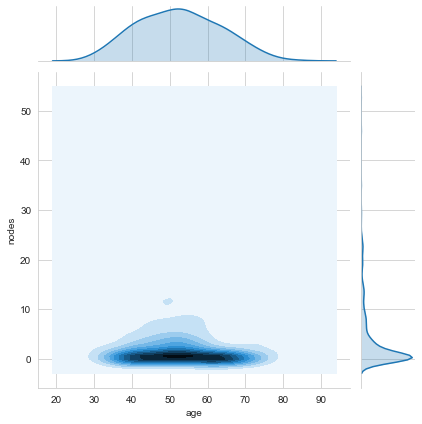

In [27]:
sns.jointplot(x='age',y='nodes',data=haberman,kind='kde')

# Observation

The above density plot shows that ages between 47-60 and nodes between 0-3. <br>
The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

# Conclusion

We can diagnose the cancer using Haberman dataset and nodes turns out to be the most important feature in predicitng the class whether the person will survive or not
